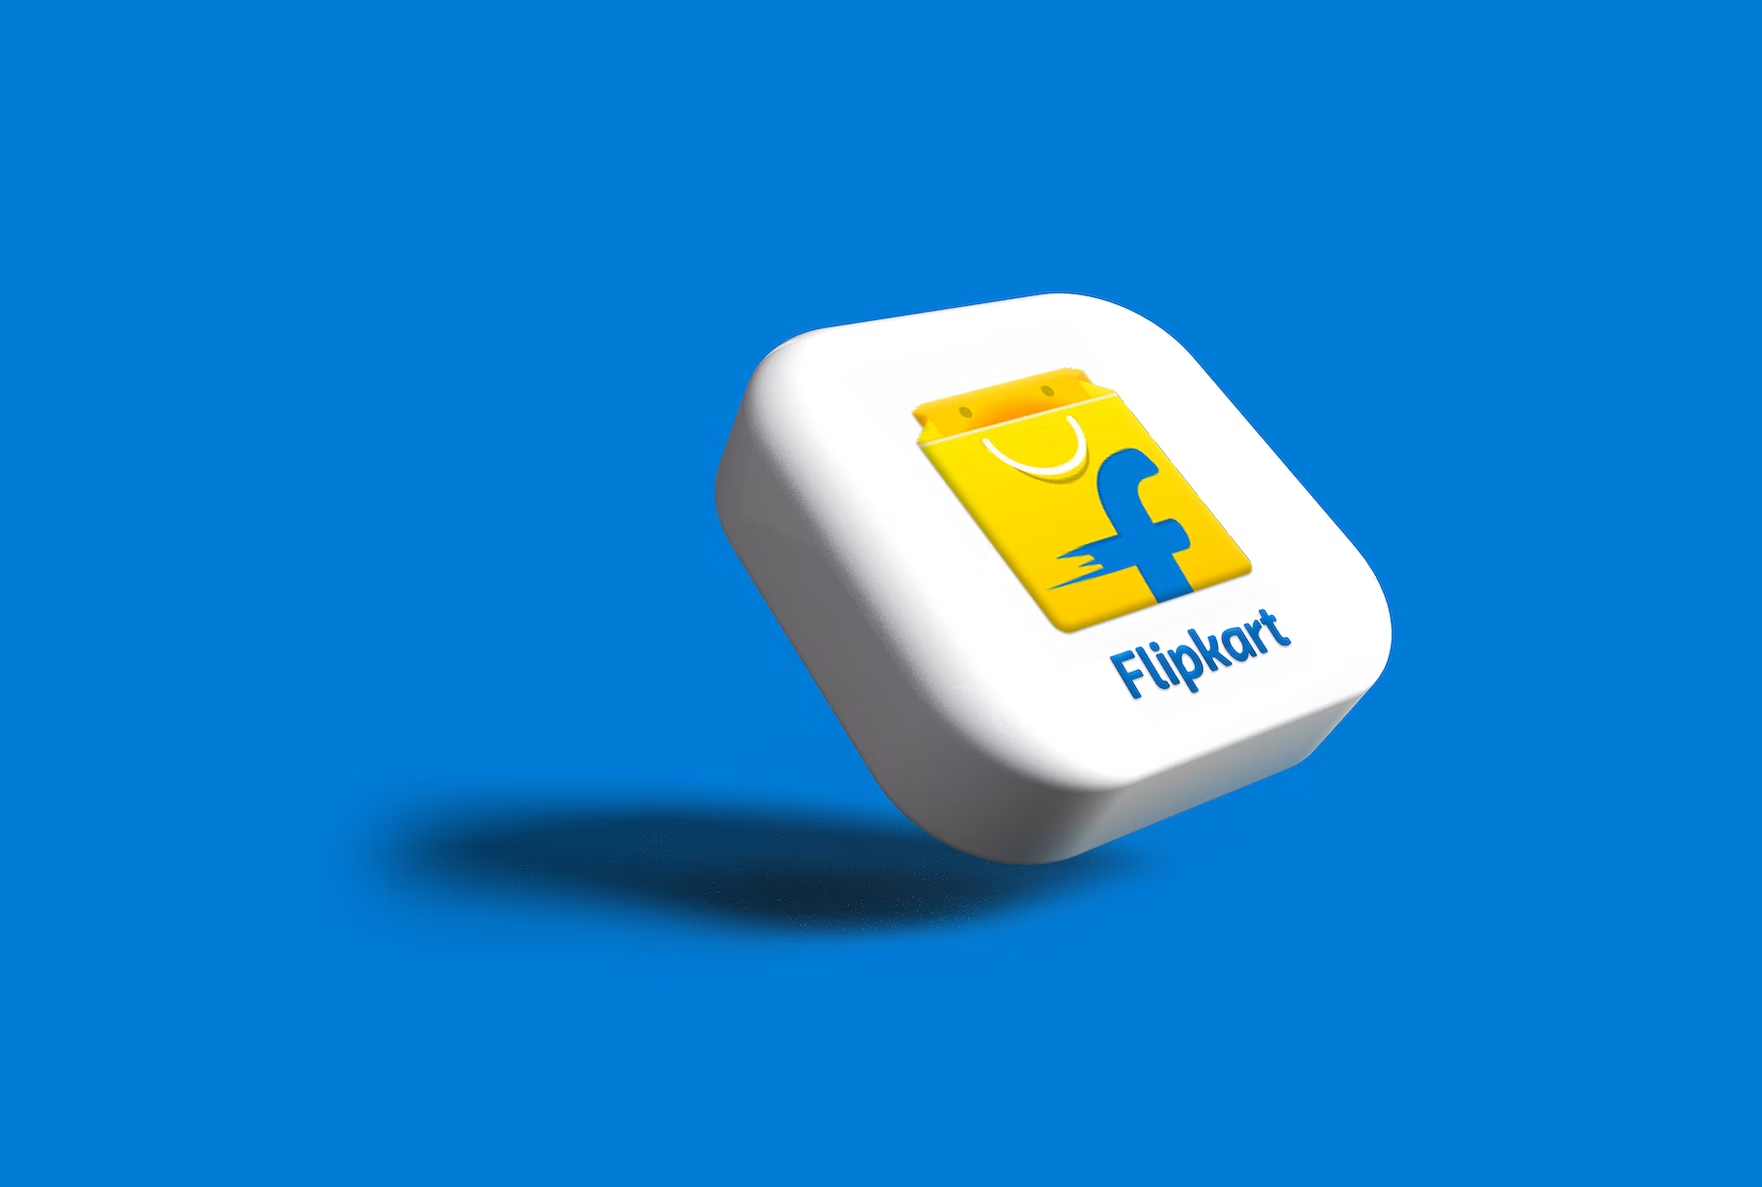

In [1]:
pip install pyforest



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=ba8237850489a7d976a7050cf7ebc18d0e98902314619ae8da52135e03b802e8
  Stored in directory: c:\users\rahul\appdata\local\pip\cache\wheels\d5\1a\3e\6193fe1c56168f5df4aef57d8411033ba4611881135d495727
Successfully built pyforest


In [2]:
from pyforest import *
import pandas as pd

In [9]:
import nltk 
from nltk.sentiment import SentimentIntensityAnalyzer

In [6]:
nltk.download();

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [7]:
nltk.download('vader_lexicon');


[nltk_data] Error loading vader_lexicon: <urlopen error [WinError
[nltk_data]     10060] A connection attempt failed because the
[nltk_data]     connected party did not properly respond after a
[nltk_data]     period of time, or established connection failed
[nltk_data]     because connected host has failed to respond>


In [10]:
# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [11]:
# Define a function to compute the sentiment of a piece of text
def get_sentiment(text):
  sentiment = sia.polarity_scores(text)
  if sentiment['compound'] > 0:
    return 'positive'
  elif sentiment['compound'] < 0:
    return 'negative'
  else:
    return 'neutral'

In [12]:
# Test the function on some text
text = "I don't like Python!"
sentiment = get_sentiment(text)
print(f"The sentiment of the text '{text}' is {sentiment}.")

The sentiment of the text 'I don't like Python!' is negative.


In [13]:
text = "great cooler excellent air flow and for this price its so amazing and unbelievablejust love it"
sentiment = get_sentiment(text)
print(f"The sentiment of the text '{text}' is {sentiment}.")

The sentiment of the text 'great cooler excellent air flow and for this price its so amazing and unbelievablejust love it' is positive.


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import string
%matplotlib inline

In [14]:
df=pd.read_csv(r'C:\Users\RAHUL\Desktop\keggale data\Flipkart Product reviews with sentiment Dataset\Dataset-SA.csv')

In [15]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


## Data Cleaning¶

In [23]:
df.isna().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [24]:
review=df['Review'].value_counts().sort_values(ascending=True)

In [25]:
review[:10]

ok for unbreakable stuff                              1
a good amp to drive components and basic bass tube    1
low cost good quality hot water bag.                  1
good amplifier                                        1
awesome at this price.                                1
pretty good and worth buying                          1
value for money.                                      1
mind blowing....sony speaker !!!!!!!                  1
ok for beginners !!!!                                 1
good one in this price range                          1
Name: Review, dtype: int64

In [26]:
df['Rate'].value_counts()

5                                                                    118765
4                                                                     41894
1                                                                     21300
3                                                                     16599
2                                                                      6491
Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)              1
Bajaj DX 2 L/W Dry Iron                                                   1
Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ¿(Grey & Turquoise)         1
Name: Rate, dtype: int64

In [30]:
df=df[(df.Rate!='Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black')&(df.Rate!='Bajaj DX 2 L/W Dry Iron')&(df.Rate!='Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ¿(Grey & Turquoise)')&(df.Rate!='Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)')]

In [31]:
df['Rate'].value_counts()

5    118765
4     41894
1     21300
3     16599
2      6491
Name: Rate, dtype: int64

(array([42165., 22486., 38712., 15871., 21037., 28349.,  8439., 11999.,
         7977.,  8014.]),
 array([  0. ,  52.1, 104.2, 156.3, 208.4, 260.5, 312.6, 364.7, 416.8,
        468.9, 521. ]),
 <BarContainer object of 10 artists>)

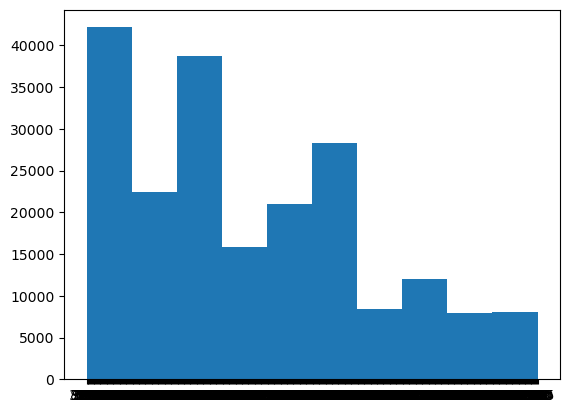

In [34]:
plt.hist(df['product_price'])

(array([118765.,      0.,  16599.,      0.,      0.,  21300.,      0.,
         41894.,      0.,   6491.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

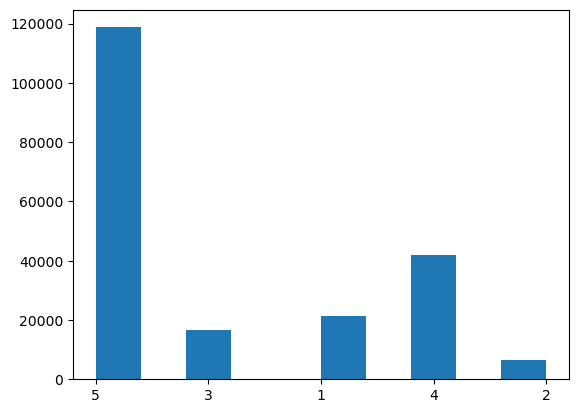

In [36]:
plt.hist(df['Rate'])

(array([166579.,      0.,      0.,      0.,      0.,  28231.,      0.,
             0.,      0.,  10239.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

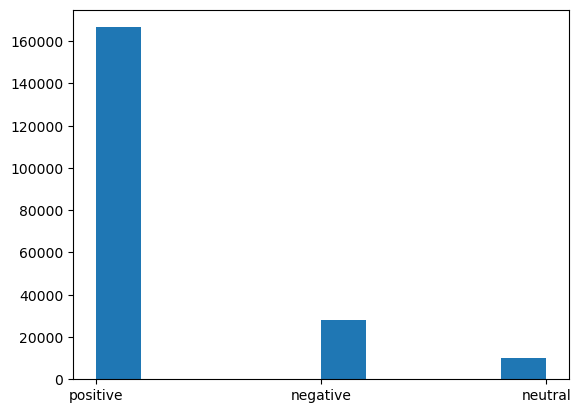

In [39]:
plt.hist(df['Sentiment'])

In [40]:
## Removing the puncuations¶
puncuations=string.punctuation

In [41]:
df['Review']=df['Review'].str.replace('[{}]'.format(puncuations),'')

C:\Users\RAHUL\AppData\Local\Temp/ipykernel_10684/2802539304.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Review']=df['Review'].str.replace('[{}]'.format(puncuations),'')


In [42]:
df['Summary']=df['Summary'].str.replace('[{}]'.format(puncuations),'')

C:\Users\RAHUL\AppData\Local\Temp/ipykernel_10684/3408009793.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Summary']=df['Summary'].str.replace('[{}]'.format(puncuations),'')


In [43]:
df['Summary'][:10]

0    great cooler excellent air flow and for this p...
1                best budget 2 fit cooler nice cooling
2    the quality is good but the power of air is de...
3                    very bad product its a only a fan
4                                        ok ok product
5    the cooler is really fantastic and provides go...
6                                    very good product
7                                            very nice
8                                      very bad cooler
9                                            very good
Name: Summary, dtype: object

In [45]:
## NLP Classification
# using summary and sentiments
df_class=df[(df.Sentiment=='positive')|(df.Sentiment=='negative')]

In [46]:
df_class = df_class.fillna(df_class.mode().iloc[0])


In [48]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194810 entries, 0 to 205050
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   194810 non-null  object
 1   product_price  194810 non-null  object
 2   Rate           194810 non-null  object
 3   Review         194810 non-null  object
 4   Summary        194810 non-null  object
 5   Sentiment      194810 non-null  object
dtypes: object(6)
memory usage: 10.4+ MB


In [49]:
x = df_class['Summary']
y = df_class['Sentiment']

In [50]:
## Count Vectorization
from sklearn.feature_extraction.text import CountVectorizer


In [55]:
cv=CountVectorizer()

In [56]:
X=cv.fit_transform(x)

In [57]:
## Train Test Split¶
from sklearn.model_selection import train_test_split


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [59]:
## Naive_bayers model
from sklearn.naive_bayes import MultinomialNB

In [60]:
nb=MultinomialNB()

In [62]:
nb.fit(X_train,y_train)

MultinomialNB()

In [63]:
## Model Prediction and Evaluation¶
predictions =nb.predict(X_test)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix


In [65]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

    negative       0.73      0.86      0.79      7173
    positive       0.98      0.96      0.97     51270

    accuracy                           0.94     58443
   macro avg       0.85      0.91      0.88     58443
weighted avg       0.95      0.94      0.95     58443



In [66]:
confusion_matrix(predictions,y_test)

array([[ 6148,  1025],
       [ 2270, 49000]], dtype=int64)

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'fit_prior': [True, False],
}

In [69]:
grid_search = GridSearchCV(nb, param_grid, cv=5)


In [70]:
grid_search.fit(X, y)


GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'fit_prior': [True, False]})

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

In [71]:
##Using Review and sentiments
df_class1 = df[(df.Sentiment=='positive') | (df.Sentiment=='negative')]


In [72]:
df_class1 = df_class1.fillna(df_class1.mode().iloc[0])


In [73]:
x = df_class1['Review']
y = df_class1['Sentiment']

In [74]:
X = cv.fit_transform(x)


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


In [76]:
nb.fit(X_train,y_train)


MultinomialNB()

In [77]:
pred = nb.predict(X_test)


In [78]:
print(confusion_matrix(y_test,pred))


[[ 5503  2915]
 [  523 49502]]


In [79]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

    negative       0.91      0.65      0.76      8418
    positive       0.94      0.99      0.97     50025

    accuracy                           0.94     58443
   macro avg       0.93      0.82      0.86     58443
weighted avg       0.94      0.94      0.94     58443



In [80]:
df['Summary'] = df['Summary'].fillna('')


In [81]:
##Text Classification Model¶
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [82]:
stop_words = set(stopwords.words('english'))


In [83]:
def preprocess_text(text):
    # tokenize text
    tokens = word_tokenize(text.lower())
    # remove punctuation and stop words
    filtered_tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    # re-join filtered tokens into a string
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text
# apply preprocess function to summary column
df['preprocessed_summary'] = df['Summary'].apply(preprocess_text)

In [85]:
bow_summary = cv.fit_transform(df['Summary'])


In [86]:
y = df['Sentiment']

# Map sentiment labels to numeric classes
class_mapping = {'positive': 0, 'neutral': 1, 'negative': 2}
y = y.map(class_mapping)


In [87]:
X_train, X_test, y_train, y_test = train_test_split(bow_summary, y, test_size=0.2, random_state=42)


In [89]:
nb.fit(X_train,y_train)


MultinomialNB()

In [90]:
## Multinomial Naive Bayes classifier¶
pred_tc = nb.predict(X_test)


In [91]:
from sklearn.metrics import accuracy_score


In [92]:
accuracy = accuracy_score(y_test, pred_tc)
print('Accuracy:', accuracy)

Accuracy: 0.9001463057790783


In [93]:
print(confusion_matrix(y_test, pred_tc))
print(classification_report(y_test, pred_tc))

[[32600   128   726]
 [ 1397   273   408]
 [ 1397    39  4042]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     33454
           1       0.62      0.13      0.22      2078
           2       0.78      0.74      0.76      5478

    accuracy                           0.90     41010
   macro avg       0.77      0.61      0.64     41010
weighted avg       0.89      0.90      0.88     41010

